# Task 2

1.	Ваш код должен быть снабжен комментариями – преподаватель не должен догадываться – что имелось в виду.
2.	Выберите датасет из встроенного в seaborn для дальнейшего анализа (опционально – можно взять любые открытые данные, используя любой открытый репозиторий).
3.	Найдите описание датасета (о чем данные, где взят и т.п.) и данных (описание – что характеризует, тип) и добавьте в отчет. Изучение предметной области – немаловажный шаг для аналитика данных.
4.	Проверьте – есть ли отсутствующие данные, если есть – удалите.
5.	Используя различного рода визуализации проведите исследование данных: закономерности, зависимости, распределения. Снабдите каждый график необходимыми подписями (заголовок, оси, легенда и т.п.), выберите подходящую цветовую гамму. В качестве образца можно взять данную лабораторную работу. 
6.	По желанию можно добавить графики и диаграммы, не описанные в работе.
7.	По каждому графику должен быть вывод – что исследовано и что получено.
8.	Сделайте общий вывод по работе.


In [2]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow

In [3]:
df = pl.read_csv('../data/raw/trades.csv')
df

id,price,volume,funds,market,created_at
i64,f64,f64,f64,str,str
3000001,73.0,4009.22,292673.06,"""usdtrub""","""2022-12-29T21:…"
3000002,73.0,424.55,30992.18,"""usdtrub""","""2022-12-29T21:…"
3000003,73.0,41095.89,3e6,"""usdtrub""","""2022-12-29T21:…"
3000004,73.0,13679.62,998612.26,"""usdtrub""","""2022-12-29T21:…"
3000005,73.0,1998.42,145884.67,"""usdtrub""","""2022-12-29T21:…"
3000006,73.01,26.94,1966.85,"""usdtrub""","""2022-12-29T21:…"
3000007,73.0,378.76,27649.48,"""usdtrub""","""2022-12-29T21:…"
3000008,73.0,972.6,71000.0,"""usdtrub""","""2022-12-29T21:…"
3000009,73.0,1976.48,144282.86,"""usdtrub""","""2022-12-29T21:…"


In [4]:
sns.scatterplot(data=df.to_pandas(), x='created_at', y='price')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000191838BAEF0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000191C1AC0EE0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [5]:
df.describe()

statistic,id,price,volume,funds,market,created_at
str,f64,f64,f64,f64,str,str
"""count""",1.998e6,1.997997e6,1.997997e6,1.998e6,"""1998000""","""1998000"""
"""null_count""",0.0,3.0,3.0,0.0,"""0""","""0"""
"""mean""",4.0209e6,87.93282,4637.863406,404847.635178,null,null
"""std""",587710.759489,8.28285,18068.446156,1.5988e6,null,null
"""min""",3.000001e6,68.68,0.17,12.06,"""usdtrub""","""2022-12-29T21:…"
"""25%""",3.512053e6,81.38,204.0,18542.0,null,null
"""50%""",4.022494e6,90.86,840.46,73076.92,null,null
"""75%""",4.530577e6,93.85,2899.69,250434.96,null,null
"""max""",5.035401e6,103.94,2.5019e6,2.2985e8,"""usdtrub""","""2024-02-20T08:…"


In [10]:
df.column

'created_at'

In [6]:
df.columns['created_at'].dt.round('5min').agg(pl.mean)

TypeError: list indices must be integers or slices, not str

In [ ]:
df.group_by().count()

In [50]:
df = pd.read_csv('../data/raw/trades.csv')
# id,price,volume,funds,market,created_at


In [51]:

# df.drop(['id','volume','funds','market'], axis=1, inplace=True)
df

,id,price,volume,funds,market,created_at
0,3000001,73.00,4009.22,292673.06,usdtrub,2022-12-29T21:43:34+07:00
1,3000002,73.00,424.55,30992.18,usdtrub,2022-12-29T21:43:35+07:00
2,3000003,73.00,41095.89,3000000.00,usdtrub,2022-12-29T21:43:35+07:00
3,3000004,73.00,13679.62,998612.26,usdtrub,2022-12-29T21:43:38+07:00
4,3000005,73.00,1998.42,145884.67,usdtrub,2022-12-29T21:43:38+07:00
...,...,...,...,...,...,...
1997995,5035397,93.47,1192.90,111500.00,usdtrub,2024-02-20T08:14:31+07:00
1997996,5035398,93.47,1444.31,135000.00,usdtrub,2024-02-20T08:14:32+07:00
1997997,5035399,93.46,1514.04,141502.18,usdtrub,2024-02-20T08:14:32+07:00
1997998,5035400,93.47,42.43,3965.89,usdtrub,2024-02-20T08:15:26+07:00


In [52]:

df['datetime'] = pd.to_datetime(df['created_at'])

In [53]:
df.drop(['created_at'], axis=1, inplace=True)

In [54]:
df

,id,price,volume,funds,market,datetime
0,3000001,73.00,4009.22,292673.06,usdtrub,2022-12-29 21:43:34+07:00
1,3000002,73.00,424.55,30992.18,usdtrub,2022-12-29 21:43:35+07:00
2,3000003,73.00,41095.89,3000000.00,usdtrub,2022-12-29 21:43:35+07:00
3,3000004,73.00,13679.62,998612.26,usdtrub,2022-12-29 21:43:38+07:00
4,3000005,73.00,1998.42,145884.67,usdtrub,2022-12-29 21:43:38+07:00
...,...,...,...,...,...,...
1997995,5035397,93.47,1192.90,111500.00,usdtrub,2024-02-20 08:14:31+07:00
1997996,5035398,93.47,1444.31,135000.00,usdtrub,2024-02-20 08:14:32+07:00
1997997,5035399,93.46,1514.04,141502.18,usdtrub,2024-02-20 08:14:32+07:00
1997998,5035400,93.47,42.43,3965.89,usdtrub,2024-02-20 08:15:26+07:00


In [55]:

grouped = df.groupby(pd.Grouper(key='datetime', axis=0, freq='5min'), group_keys=True)[['price']].min()

In [56]:
grouped

,price
datetime,
2022-12-29 21:40:00+07:00,72.95
2022-12-29 21:45:00+07:00,72.95
2022-12-29 21:50:00+07:00,72.90
2022-12-29 21:55:00+07:00,72.90
2022-12-29 22:00:00+07:00,72.82
...,...
2024-02-20 07:55:00+07:00,93.45
2024-02-20 08:00:00+07:00,NaN
2024-02-20 08:05:00+07:00,93.47


In [57]:
# grouped.to_csv('../data/processed/usdtrub5min.csv')

In [58]:
grouped.describe()

,price
count,116737.000000
mean,87.476291
std,8.475417
min,68.680000
25%,80.320000
50%,90.550000
75%,93.710000
max,103.080000


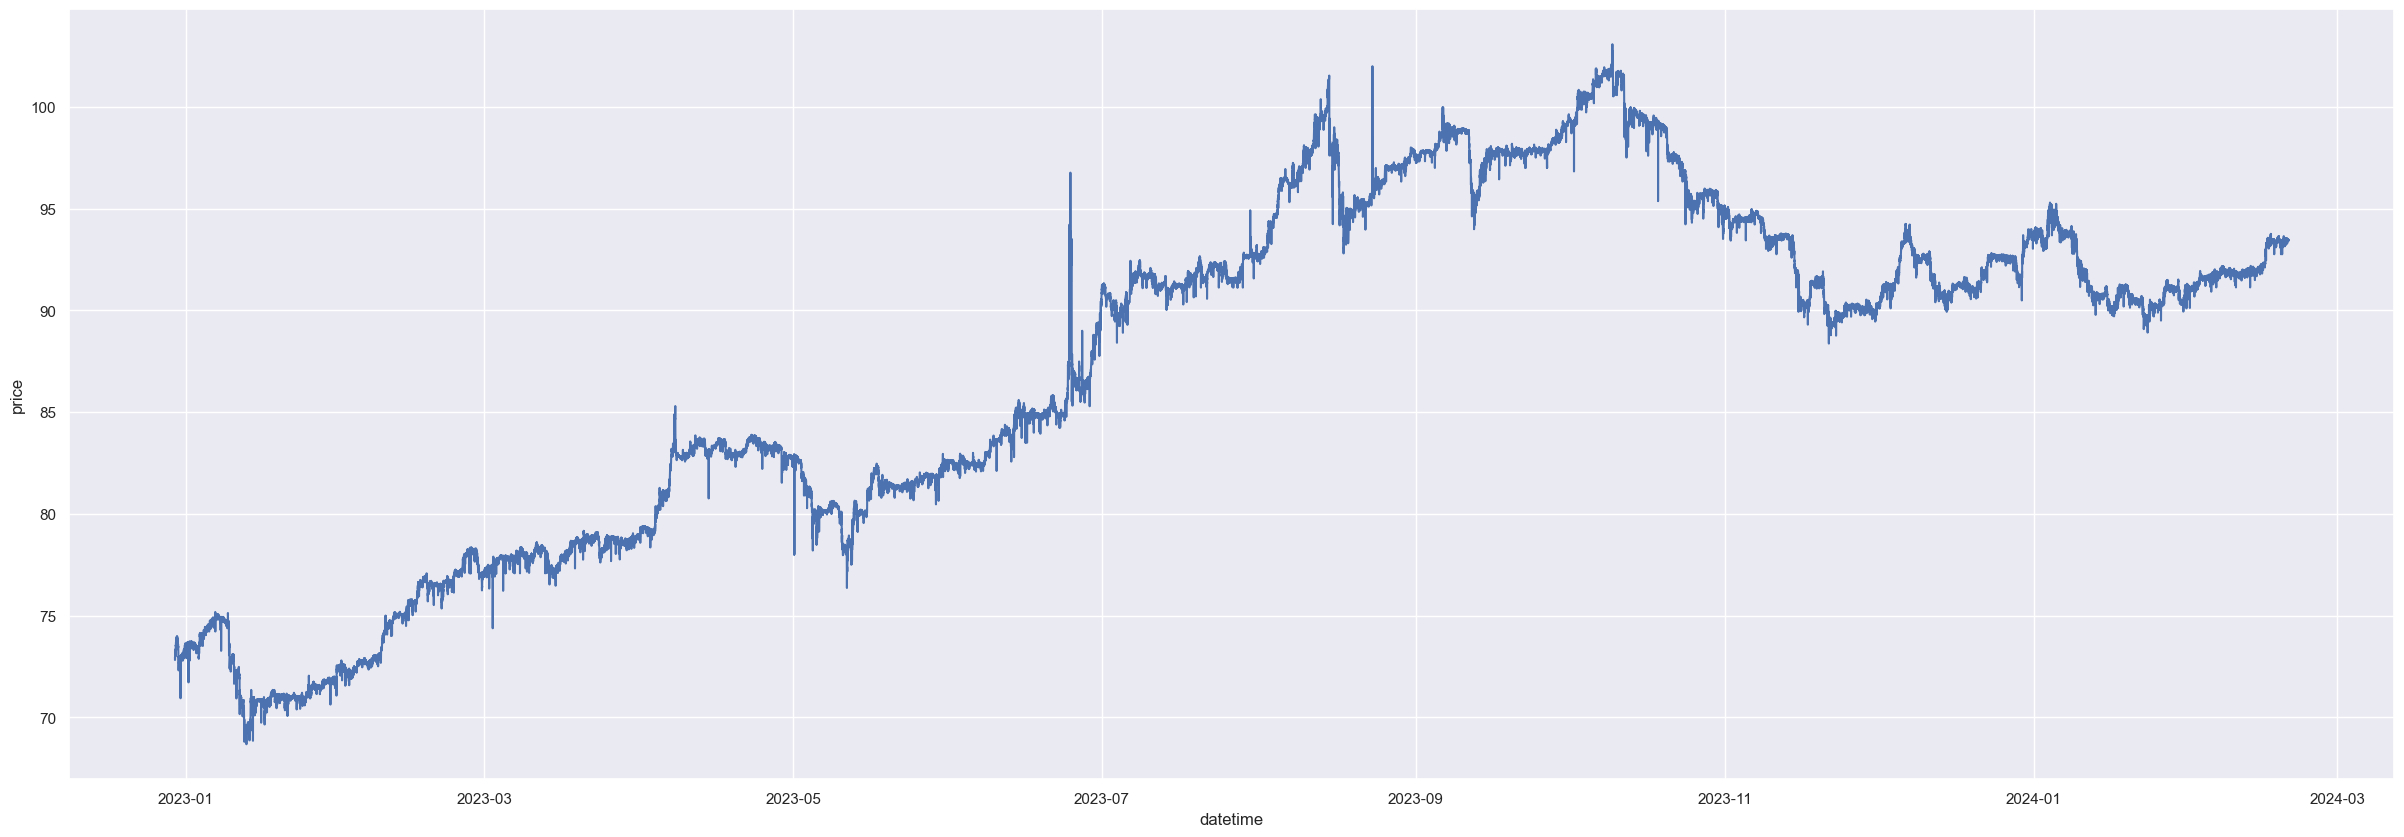

In [63]:
sns.set(rc={'figure.figsize':(30,10)})
p = sns.lineplot(data=grouped, x='datetime', y='price')

In [73]:
grouped.sort_values(by='datetime', ascending=False)

,price
datetime,
2024-02-20 08:15:00+07:00,93.47
2024-02-20 08:10:00+07:00,93.46
2024-02-20 08:05:00+07:00,93.47
2024-02-20 08:00:00+07:00,NaN
2024-02-20 07:55:00+07:00,93.45
...,...
2022-12-29 22:00:00+07:00,72.82
2022-12-29 21:55:00+07:00,72.90
2022-12-29 21:50:00+07:00,72.90


In [4]:
df = pd.read_csv('../data/raw/zhenya.csv')

In [6]:
df

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2023-02-01T01:00:00.000Z,2023-02-01T01:59:59.999Z,2023-02-01T01:21:00.000Z,2023-02-01T01:00:00.000Z,2806,70.592286,70.597622,70.581921,70.581921,2.211788e+12,4.785866e+12,2023-02-01T01:59:59.999Z
1,2023-02-01T02:00:00.000Z,2023-02-01T02:59:59.999Z,2023-02-01T02:58:00.000Z,2023-02-01T02:41:00.000Z,2806,70.581354,70.599049,70.581354,70.597998,2.187608e+12,4.785074e+12,2023-02-01T02:59:59.999Z
2,2023-02-01T03:00:00.000Z,2023-02-01T03:59:59.999Z,2023-02-01T03:00:00.000Z,2023-02-01T03:30:00.000Z,2806,70.598777,70.598777,70.592565,70.593852,2.186387e+12,4.785767e+12,2023-02-01T03:59:59.999Z
3,2023-02-01T04:00:00.000Z,2023-02-01T04:59:59.999Z,2023-02-01T04:41:00.000Z,2023-02-01T04:30:00.000Z,2806,70.594354,70.594354,70.120762,70.122305,2.184401e+12,4.785735e+12,2023-02-01T04:59:59.999Z
4,2023-02-01T05:00:00.000Z,2023-02-01T05:59:59.999Z,2023-02-01T05:25:00.000Z,2023-02-01T05:31:00.000Z,2806,70.123580,70.182540,70.123580,70.182540,2.160750e+12,4.753785e+12,2023-02-01T05:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...,...
9233,2024-02-20T18:00:00.000Z,2024-02-20T18:59:59.999Z,2024-02-20T18:04:00.000Z,2024-02-20T18:31:00.000Z,2806,92.487688,92.502218,92.434393,92.473057,5.946738e+12,9.035308e+12,2024-02-20T18:59:59.999Z
9234,2024-02-20T19:00:00.000Z,2024-02-20T19:59:59.999Z,2024-02-20T19:14:00.000Z,2024-02-20T19:27:00.000Z,2806,92.470375,92.494322,92.420410,92.459199,6.038713e+12,9.033954e+12,2024-02-20T19:59:59.999Z
9235,2024-02-20T20:00:00.000Z,2024-02-20T20:59:59.999Z,2024-02-20T20:50:00.000Z,2024-02-20T20:07:00.000Z,2806,92.480064,92.520019,92.441288,92.503495,6.136104e+12,9.038282e+12,2024-02-20T20:59:59.999Z
9236,2024-02-20T21:00:00.000Z,2024-02-20T21:59:59.999Z,2024-02-20T21:48:00.000Z,2024-02-20T21:22:00.000Z,2806,92.518781,92.521799,92.455852,92.514926,6.147129e+12,9.039399e+12,2024-02-20T21:59:59.999Z


In [5]:
df.describe()

,name,open,high,low,close,volume,marketCap
count,9238.0,9238.000000,9238.000000,9238.000000,9238.000000,9.238000e+03,9.238000e+03
mean,2806.0,87.361985,87.420654,87.308462,87.362811,2.787072e+12,7.360676e+12
std,0.0,7.733393,7.738397,7.729696,7.731954,1.319541e+12,1.069831e+12
min,2806.0,69.820810,69.823679,69.819259,69.820683,9.356063e+11,4.734909e+12
25%,2806.0,80.641511,80.735604,80.579649,80.687205,1.836050e+12,6.627421e+12
50%,2806.0,89.761645,89.787028,89.729130,89.762200,2.441894e+12,7.816956e+12
75%,2806.0,92.682232,92.745344,92.632722,92.675152,3.464377e+12,8.160586e+12
max,2806.0,102.178300,102.183168,101.515022,102.177394,2.266699e+13,9.068808e+12


<Axes: xlabel='timestamp', ylabel='close'>

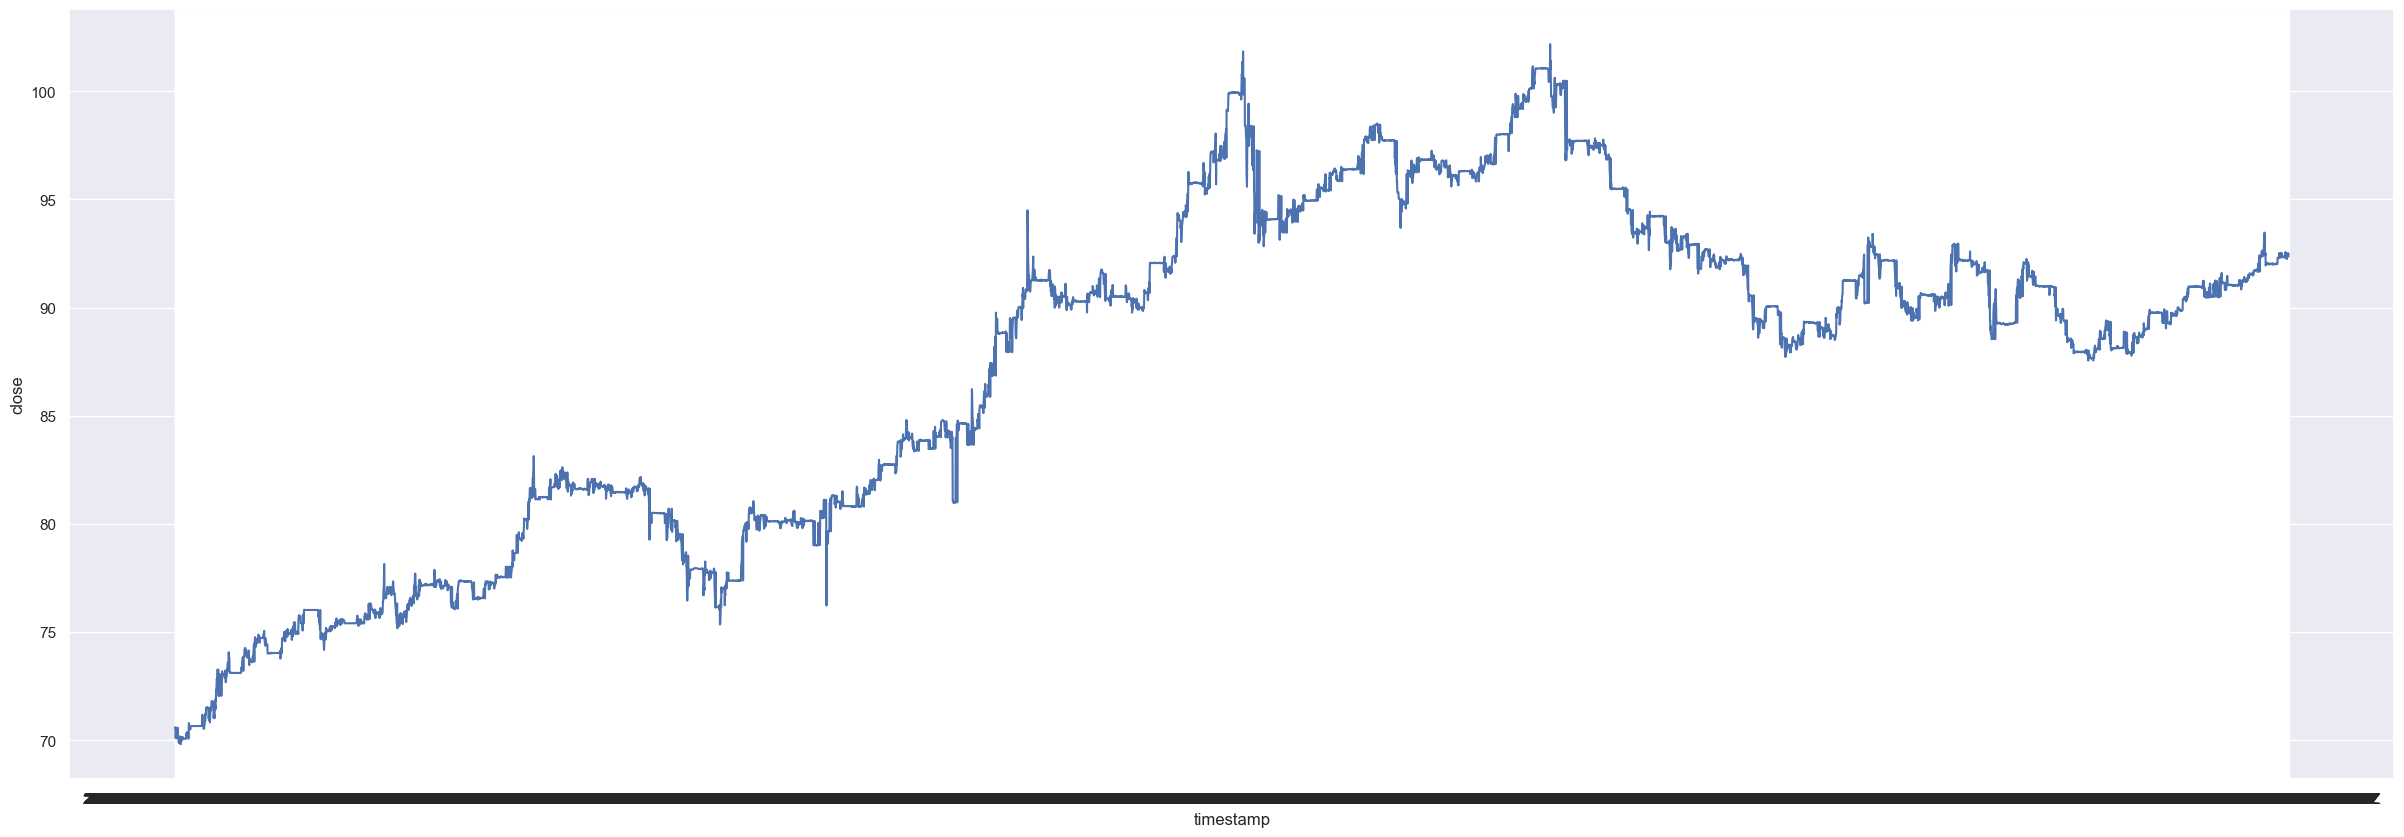

In [8]:
sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(data=df, x='timestamp', y='close')

In [11]:
fmt = df[['close', 'timestamp']]

In [19]:
fmt1 = fmt.rename(columns={'timestamp': 'ts', 'close': 'ask_rate'})

In [20]:
fmt1

,ask_rate,ts
0,70.581921,2023-02-01T01:59:59.999Z
1,70.597998,2023-02-01T02:59:59.999Z
2,70.593852,2023-02-01T03:59:59.999Z
3,70.122305,2023-02-01T04:59:59.999Z
4,70.182540,2023-02-01T05:59:59.999Z
...,...,...
9233,92.473057,2024-02-20T18:59:59.999Z
9234,92.459199,2024-02-20T19:59:59.999Z
9235,92.503495,2024-02-20T20:59:59.999Z
9236,92.514926,2024-02-20T21:59:59.999Z


In [21]:
fmt1.insert(0, 'quote_currency', 'USDT')

In [22]:
fmt1

,quote_currency,ask_rate,ts
0,USDT,70.581921,2023-02-01T01:59:59.999Z
1,USDT,70.597998,2023-02-01T02:59:59.999Z
2,USDT,70.593852,2023-02-01T03:59:59.999Z
3,USDT,70.122305,2023-02-01T04:59:59.999Z
4,USDT,70.182540,2023-02-01T05:59:59.999Z
...,...,...,...
9233,USDT,92.473057,2024-02-20T18:59:59.999Z
9234,USDT,92.459199,2024-02-20T19:59:59.999Z
9235,USDT,92.503495,2024-02-20T20:59:59.999Z
9236,USDT,92.514926,2024-02-20T21:59:59.999Z


In [28]:
fmt1.insert(4, 'base_currency', 'RUB')

ValueError: cannot insert base_currency, already exists

In [26]:
fmt1

,quote_currency,ask_rate,ts,base_currency
0,USDT,70.581921,2023-02-01T01:59:59.999Z,RUB
1,USDT,70.597998,2023-02-01T02:59:59.999Z,RUB
2,USDT,70.593852,2023-02-01T03:59:59.999Z,RUB
3,USDT,70.122305,2023-02-01T04:59:59.999Z,RUB
4,USDT,70.182540,2023-02-01T05:59:59.999Z,RUB
...,...,...,...,...
9233,USDT,92.473057,2024-02-20T18:59:59.999Z,RUB
9234,USDT,92.459199,2024-02-20T19:59:59.999Z,RUB
9235,USDT,92.503495,2024-02-20T20:59:59.999Z,RUB
9236,USDT,92.514926,2024-02-20T21:59:59.999Z,RUB


In [31]:
fmt1['base_currency'] = fmt1['base_currency'].apply(lambda x: 'RUB1')

In [32]:
fmt1

,quote_currency,ask_rate,ts,base_currency
0,USDT,70.581921,2023-02-01T01:59:59.999Z,RUB1
1,USDT,70.597998,2023-02-01T02:59:59.999Z,RUB1
2,USDT,70.593852,2023-02-01T03:59:59.999Z,RUB1
3,USDT,70.122305,2023-02-01T04:59:59.999Z,RUB1
4,USDT,70.182540,2023-02-01T05:59:59.999Z,RUB1
...,...,...,...,...
9233,USDT,92.473057,2024-02-20T18:59:59.999Z,RUB1
9234,USDT,92.459199,2024-02-20T19:59:59.999Z,RUB1
9235,USDT,92.503495,2024-02-20T20:59:59.999Z,RUB1
9236,USDT,92.514926,2024-02-20T21:59:59.999Z,RUB1


In [33]:
fmt1.to_csv('../data/processed/usdtrub1h.csv')